# Datastory Trachea-, bronchiën- en longkanker



# Inleiding

Kanker is een ingrijpende ziekte die vele mensen wereldwijd raakt. De oorzaak van kanker is hangt af van de soort kanker. Voor trachea, bronchus en long (TBL) kanker zijn er  twee hoofdoorzaken: roken en slechte luchtkwaliteit (Safiri et al., 2021). In dit dataverhaal wordt gekeken naar deze twee perspectieven. Wordt TBL-kanker veroorzaakt door de slechte luchtkwaliteit of door roken? 
Om dit te onderzoeken bekijken we de volgende dataset over kankertype en doden: https://www.kaggle.com/datasets/antimoni/cancer-deaths-by-country-and-type-1990-2016 
The Cancer Deaths by Country and Type dataset bevat data van 18 verschillende soorten kanker (prostaatkanker, leverkanker etc.) en het dodental per soort kanker per jaar en per land. De data is van 1990-2016. De data is verzameld van de WHO (World Health Organisation).
Dit gaan we dan vergelijken met de dataset van uitstoot:
https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022

De Emissions by Country dataset bevat mondiale data van fossiele brandstof CO2-uitstoot per land per jaar. De dataset bevat totale CO2-uitstoot per jaar per land maar ook uitstoot per aandeel gas, olie, kolen of uitstoot per inwoner. De dataset is van 1750-2021.

En de dataset over roken: 
https://www.kaggle.com/datasets/mexwell/us-smoking-trend

De Global Smoking Trend dataset bevat data over het aantal rokers per land per jaar. De dataset is van 1980-2012.


# 

In [52]:
# Import packages
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go 
import seaborn as sns
import IPython
from plotly.subplots import make_subplots

In [53]:
from IPython.display import display

# Load the Cancer Data Set
cancer_df = pd.read_csv("csv/CancerDeaths.csv")
print("Cancer Data Set")
display(cancer_df.head(n=5))

# Load the Emissions Data Set
emissions_df = pd.read_csv("csv/Emissions.csv")
print("Emissions Data Set")
display(emissions_df.iloc[250:255])

# Load the Population Data Set
population_df = pd.read_csv("csv/Population.csv")
print("Population Data Set")
display(population_df.head(n=5))

# Load the Smoking Data Set
smoking_df = pd.read_csv("csv/smoking.csv")
print("Smoking Data Set")
display(smoking_df.head(n=5))

Cancer Data Set


,Country,Code,Year,Liver cancer,Kidney cancer,Larynx cancer,Breast cancer,Thyroid cancer,Stomach cancer,Bladder cancer,...,Non-melanoma skin cancer,Lip and oral cavity cancer,Brain and nervous system cancer,"Tracheal, bronchus, and lung cancer",Gallbladder and biliary tract cancer,Malignant skin melanoma,Leukemia,Hodgkin lymphoma,Multiple myeloma,Other cancers
0,Afghanistan,AFG,1990,243.663716,39.470495,109.334207,766.535431,79.820167,923.495208,148.139204,...,26.446156,53.599636,163.869062,797.265710,125.936240,14.293978,727.763429,191.367386,50.719442,294.839679
1,Afghanistan,AFG,1991,261.241824,41.376024,117.311719,823.233932,85.111020,989.709648,156.977412,...,28.275271,57.148890,174.183219,853.126362,133.781377,15.241048,766.040181,203.509622,54.317640,311.469065
2,Afghanistan,AFG,1992,284.443630,44.106315,128.071634,901.022100,92.240603,1078.459037,168.990462,...,30.718152,61.876100,188.382296,927.812846,144.287648,16.508833,820.956547,220.208033,59.144200,334.565964
3,Afghanistan,AFG,1993,313.136816,47.424854,141.429604,996.432762,101.206726,1192.064525,184.347737,...,33.835442,67.504857,205.250430,1017.964700,157.471005,18.038507,891.134162,240.718821,64.938582,362.486749
4,Afghanistan,AFG,1994,343.229715,50.710951,155.754606,1097.895223,110.679923,1316.505674,200.246949,...,37.103370,73.175879,222.383572,1110.997186,171.311262,19.606636,965.286072,262.324068,70.930355,390.334685


Emissions Data Set


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
250,Afghanistan,AFG,2000,1.047128,0.003664,0.787760,0.223504,0.010216,0.021984,NaN,0.053581
251,Afghanistan,AFG,2001,1.069098,0.069616,0.762112,0.208848,0.006538,0.021984,NaN,0.054300
252,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.000000,NaN,0.063856
253,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.000000,NaN,0.068871
254,Afghanistan,AFG,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.000000,NaN,0.052529


Population Data Set


,Unnamed: 0,Location,Time,PopMale,PopFemale,PopTotal,PopDensity
0,0,Afghanistan,2001,"11117,754","10489,238","21606,992",33.096
1,1,Afghanistan,2002,"11642,106","10958,668","22600,774",34.618
2,2,Afghanistan,2003,"12214,634","11466,237","23680,871",36.273
3,3,Afghanistan,2004,"12763,726","11962,963","24726,689",37.874
4,4,Afghanistan,2005,"13239,684","12414,59","25654,274",39.295


Smoking Data Set


,Country,Year,Data.Daily cigarettes,Data.Percentage.Male,Data.Percentage.Female,Data.Percentage.Total,Data.Smokers.Total,Data.Smokers.Female,Data.Smokers.Male
0,Afghanistan,1980,5.7,10.4,18.4,2.4,733520,81707,651813
1,Afghanistan,1981,5.8,10.5,18.4,2.3,720102,79276,640826
2,Afghanistan,1982,5.8,10.5,18.5,2.3,700415,76061,624355
3,Afghanistan,1983,5.9,10.5,18.6,2.3,676984,72411,604572
4,Afghanistan,1984,6.0,10.6,18.6,2.3,653812,68908,584905


## Fijnstof

Luchtvervuiling en met name fijnstof is een van de grootste veroorzakers van longkanker.

Luchtvervuiling en met name fijnstof, wat veroorzaakt wordt door onvolledige verbranding van fossiele brandstoffen (Cohen & Pope, 1995), is een grote veroorzaker van onder andere longkanker. In 2016 was met 19 procent van alle kanker-gerelateerde overlijdens TBL-kanker (Trachea, bronchiën en longkanker) de grootste doodsoorzaak onder alle kankersoorten (Safiri et al., 2021). De globale uitstoot stijgt, en met die uitstoot dus ook de uitstoot van fijnstof. Dit leidt tot een toename in TBL kanker, hieronder is een aantal grafieken neergezet die goed laten zien wat de uitstoot van fijnstof voor invloed heeft op TBL-kanker.

In [54]:
# Filter the DataFrame for the desired country and year range
cancer_country = 'World'  # Replace with the desired country code
emissions_country = 'Global'  # Replace with the desired country code

cancer_data = cancer_df[(cancer_df['Country'] == cancer_country) & (cancer_df['Year'] >= 2001)]
emissions_data = emissions_df[(emissions_df['Country'] == emissions_country) & (emissions_df['Year'] >= 2001)]

# Extract the Year and Lung cancer columns
year_lung_cancer = cancer_data[['Year', "Tracheal, bronchus, and lung cancer "]]
year_total_emissions = emissions_data[['Year', 'Total']]

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Tracheale, bronchus- en longkanker per jaar', 'Totale Emissies Per Jaar Wereldwijd'))

# Add the lung cancer data trace to the first subplot
fig.add_trace(go.Scatter(x=year_lung_cancer['Year'], y=year_lung_cancer["Tracheal, bronchus, and lung cancer "],
                         mode='lines', name='Tracheale, bronchus- en longkanker'),
              row=1, col=1)

# Add the total emissions data trace to the second subplot
fig.add_trace(go.Scatter(x=year_total_emissions['Year'], y=year_total_emissions['Total'],
                         mode='lines', name='Totale Emissies'),
              row=1, col=2)

# Update the layout for the entire figure
fig.update_layout(
    title_text='Vergelijking van Tracheale, bronchus- en longkanker en Totale Emissies per jaar',
    showlegend=False
)

# Update x-axis and y-axis titles for each subplot
fig.update_xaxes(title_text='Jaar', row=1, col=1)
fig.update_yaxes(title_text='Tracheale, bronchus- en longkanker', row=1, col=1)
fig.update_xaxes(title_text='Jaar', row=1, col=2)
fig.update_yaxes(title_text='Totale Emissies', row=1, col=2)

# Show the plot
fig.show()

# Wereld visualisatie

Er zijn ook erg veel culturele verschillen op het gebied van longkanker, op deze wereldkaarten valt te zien welke gebieden in de wereld het meeste te maken hebben met longkanker en luchtvervuiling.

In [72]:
# Load the datasets
df_lung = pd.read_csv("csv/CancerDeaths.csv")
df_emissions = pd.read_csv("csv/Emissions.csv")
df_population = pd.read_csv("csv/Population.csv")

# Strip any leading/trailing whitespace from column names
df_lung.columns = df_lung.columns.str.strip()
df_emissions.columns = df_emissions.columns.str.strip()
df_population.columns = df_population.columns.str.strip()

# Ensure correct data types for population columns
df_population['PopTotal'] = df_population['PopTotal'].str.replace(',', '').astype(float)

# Standardize country names using a mapping dictionary
country_name_mapping = {
    'Russian Federation': 'Russia',
    'United States of America': 'United States',
    'United States of America': 'USA',
    # Add other mappings if necessary
}

# Apply the mapping to the population dataset
df_population['Location'] = df_population['Location'].replace(country_name_mapping)

# Merge the lung cancer data with population data using country names and years
df_lung_merged = pd.merge(df_lung, df_population, left_on=['Country', 'Year'], right_on=['Location', 'Time'])
df_lung_merged['Lung Cancer Per Capita'] = df_lung_merged['Tracheal, bronchus, and lung cancer'] / df_lung_merged['PopTotal']

# Merge the emissions data with population data using country names and years
df_emissions_merged = pd.merge(df_emissions, df_population, left_on=['Country', 'Year'], right_on=['Location', 'Time'])
df_emissions_merged['Emissions Per Capita'] = df_emissions_merged['Total'] / df_emissions_merged['PopTotal']

# Aggregate data by country and code
df_lung_per_capita = df_lung_merged.groupby(['Country', 'Code'])['Lung Cancer Per Capita'].mean().reset_index()
df_emissions_per_capita = df_emissions_merged.groupby(['Country', 'ISO 3166-1 alpha-3'])['Emissions Per Capita'].mean().reset_index()

# Rename the columns for better readability
df_lung_per_capita.columns = ['Country', 'Code', 'Lung Cancer Per Capita']
df_emissions_per_capita.columns = ['Country', 'Code', 'Emissions Per Capita']

# Create the choropleth map for lung cancer rates
fig_lung = px.choropleth(df_lung_per_capita,
                         locations='Code',
                         color='Lung Cancer Per Capita',
                         hover_name='Country',
                         color_continuous_scale=px.colors.sequential.Plasma,
                         title='Lung Cancer Rates per Capita by Country')

# Update layout for a larger map
fig_lung.update_layout(
    title_text='TBL-Kanker Cijfers per Capita per Land',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    width=1000,
    height=666,
    coloraxis_colorbar=dict(
        title="TBL-kanker<br>Per Capita",
    )
)

# Create the choropleth map for emissions
fig_emissions = px.choropleth(df_emissions_per_capita,
                              locations='Code',
                              color='Emissions Per Capita',
                              hover_name='Country',
                              color_continuous_scale=px.colors.sequential.Viridis,
                              title='Emissions per Capita by Country'
                              )

# Update layout for a larger map
fig_emissions.update_layout(
    title_text='Emissies per Capita per Land',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    width=1000,
    height=666,
    coloraxis_colorbar=dict(
        title="Emissies<br>Per Capita",
    )
)

# Show the figures
fig_lung.show()
fig_emissions.show()

# India en Amerika

In de grafiek hieronder zijn twee duidelijke grafieken gemaakt, hierin is heel duidelijk te zien dat het aantal longkanker gevallen flink stijgt als de emissies per capita ook omhoog gaan.

<Figure size 1400x1000 with 0 Axes>

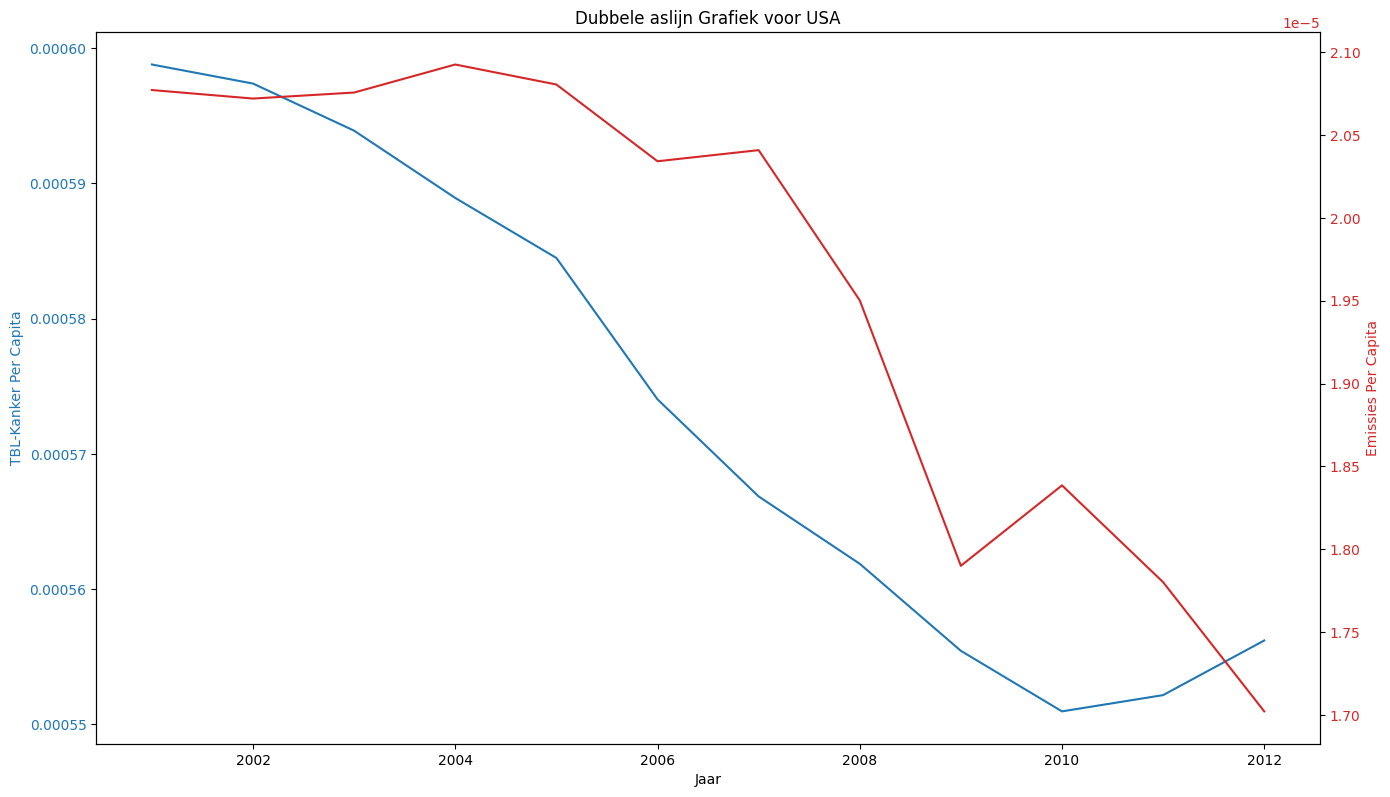

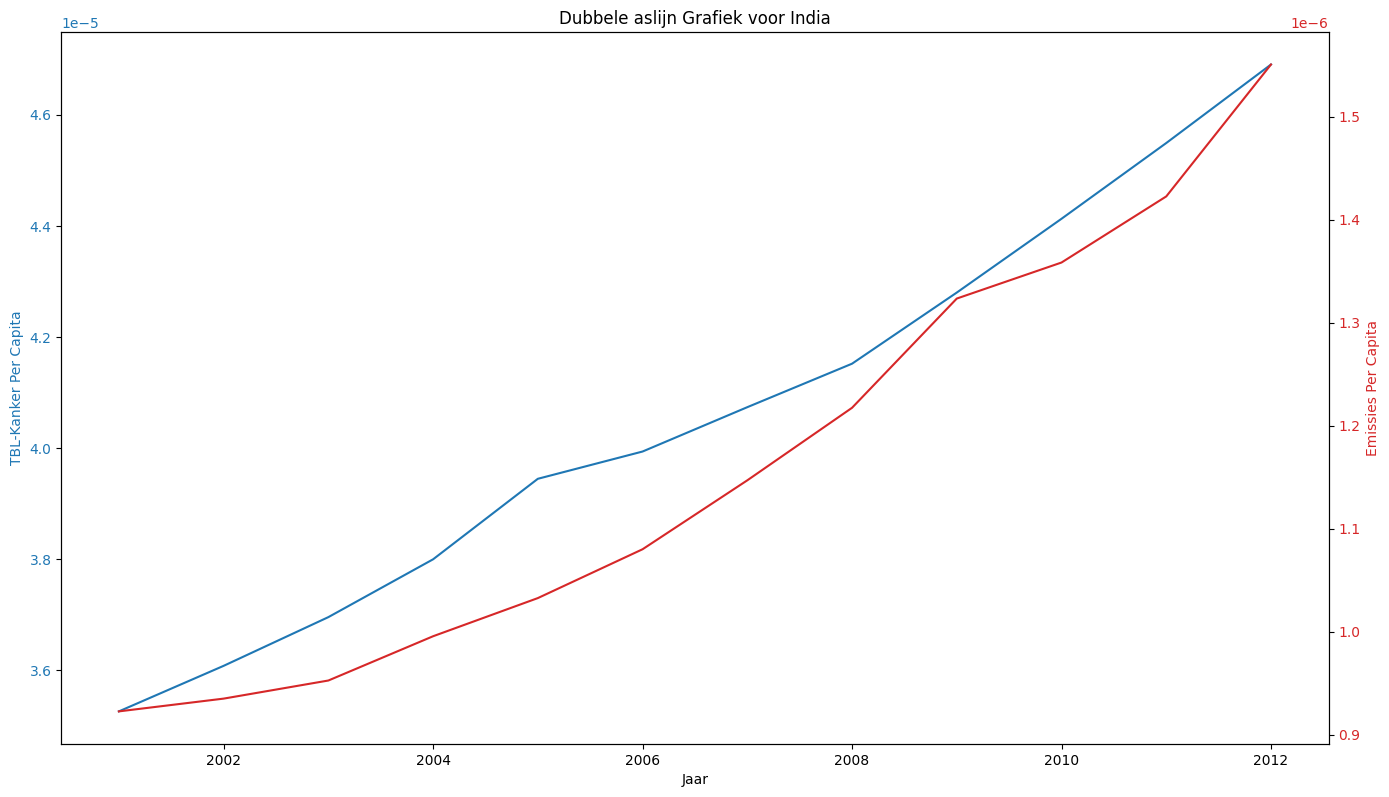

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df_lung = pd.read_csv("csv/CancerDeaths.csv")
df_emissions = pd.read_csv("csv/Emissions.csv")
df_population = pd.read_csv("csv/Population.csv")

# Strip any leading/trailing whitespace from column names
df_lung.columns = df_lung.columns.str.strip()
df_emissions.columns = df_emissions.columns.str.strip()
df_population.columns = df_population.columns.str.strip()

# Ensure correct data types for population columns
df_population['PopTotal'] = df_population['PopTotal'].str.replace(',', '').astype(float)

# Standardize country names using a mapping dictionary
country_name_mapping = {
    'Russian Federation': 'Russia',
    'United States of America': 'USA',
    'United States': 'USA',
    # Add other mappings if necessary
}

# Apply the mapping to the population dataset
df_population['Location'] = df_population['Location'].replace(country_name_mapping)

# Apply the mapping to the emissions dataset
df_emissions['Country'] = df_emissions['Country'].replace(country_name_mapping)

# Apply the mapping to the lung cancer dataset
df_lung['Country'] = df_lung['Country'].replace(country_name_mapping)

# Filter data to include only years 1990-2012
df_lung_filtered = df_lung[(df_lung['Year'] >= 1990) & (df_lung['Year'] <= 2012)]
df_emissions_filtered = df_emissions[(df_emissions['Year'] >= 1990) & (df_emissions['Year'] <= 2012)]

# Merge the lung cancer data with population data
df_lung_merged = pd.merge(df_lung_filtered, df_population, left_on=['Country', 'Year'], right_on=['Location', 'Time'])
df_lung_merged['Lung Cancer Per Capita'] = df_lung_merged['Tracheal, bronchus, and lung cancer'] / df_lung_merged['PopTotal']

# Merge the emissions data with population data
df_emissions_merged = pd.merge(df_emissions_filtered, df_population, left_on=['Country', 'Year'], right_on=['Location', 'Time'])
df_emissions_merged['Emissions Per Capita'] = df_emissions_merged['Total'] / df_emissions_merged['PopTotal']

# Aggregate data by country, year, and code
df_lung_per_capita = df_lung_merged.groupby(['Country', 'Year', 'Code'])['Lung Cancer Per Capita'].mean().reset_index()
df_emissions_per_capita = df_emissions_merged.groupby(['Country', 'Year', 'ISO 3166-1 alpha-3'])['Emissions Per Capita'].mean().reset_index()

# Rename the columns for better readability
df_lung_per_capita.columns = ['Country', 'Year', 'Code', 'Lung Cancer Per Capita']
df_emissions_per_capita.columns = ['Country', 'Year', 'Code', 'Emissions Per Capita']

# Merge the two datasets on country code and year
df_combined = pd.merge(df_lung_per_capita, df_emissions_per_capita, on=['Country', 'Year', 'Code'])

# Create a dual-axis line chart
plt.figure(figsize=(14, 10))

# Choose a country to plot, for example 'USA'
country_to_plot = 'USA'
df_country = df_combined[df_combined['Country'] == country_to_plot]

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Jaar')
ax1.set_ylabel('TBL-Kanker Per Capita', color=color)
ax1.plot(df_country['Year'], df_country['Lung Cancer Per Capita'], color=color, label='Lung Cancer Per Capita')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Emissies Per Capita', color=color)
ax2.plot(df_country['Year'], df_country['Emissions Per Capita'], color=color, label='Emissions Per Capita')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title(f'Dubbele aslijn Grafiek voor {country_to_plot}')
plt.show()


country_to_plot = 'India'
df_country = df_combined[df_combined['Country'] == country_to_plot]

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Jaar')
ax1.set_ylabel('TBL-Kanker Per Capita', color=color)
ax1.plot(df_country['Year'], df_country['Lung Cancer Per Capita'], color=color, label='Lung Cancer Per Capita')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Emissies Per Capita', color=color)
ax2.plot(df_country['Year'], df_country['Emissions Per Capita'], color=color, label='Emissions Per Capita')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title(f'Dubbele aslijn Grafiek voor {country_to_plot}')
plt.show()

# Correlatie plots

Hieronder staat een aantal plots dat correlaties laat zien tussen verschillende variabelen uit onze datasets.

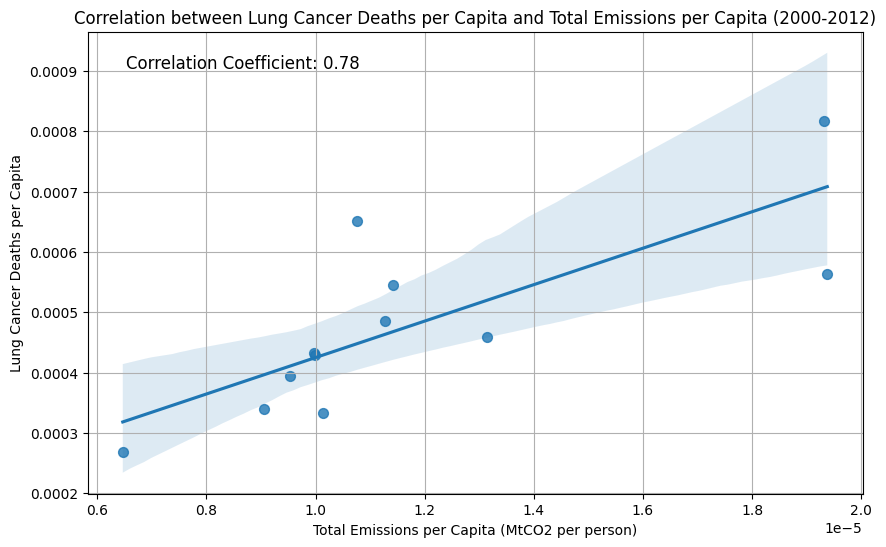

In [74]:
# Load the datasets
df_lung = pd.read_csv("csv/CancerDeaths.csv")
df_emissions = pd.read_csv("csv/Emissions.csv")
df_population = pd.read_csv("csv/Population.csv")

# Strip any leading/trailing whitespace from column names
df_lung.columns = df_lung.columns.str.strip()
df_emissions.columns = df_emissions.columns.str.strip()
df_population.columns = df_population.columns.str.strip()

# Ensure correct data types for population columns
df_population['PopTotal'] = df_population['PopTotal'].str.replace(',', '').astype(float)

# Standardize country names using a mapping dictionary
country_name_mapping = {
    'Russian Federation': 'Russia',
    'United States of America': 'USA',
    'United States': 'USA',
    # Add other mappings if necessary
}

# Apply the mapping to the population dataset
df_population['Location'] = df_population['Location'].replace(country_name_mapping)

# Apply the mapping to the emissions dataset
df_emissions['Country'] = df_emissions['Country'].replace(country_name_mapping)

# Apply the mapping to the lung cancer dataset
df_lung['Country'] = df_lung['Country'].replace(country_name_mapping)

# Filter data to include only years 2000-2012
df_lung_filtered = df_lung[(df_lung['Year'] >= 2000) & (df_lung['Year'] <= 2012)]
df_emissions_filtered = df_emissions[(df_emissions['Year'] >= 2000) & (df_emissions['Year'] <= 2012)]
df_population_filtered = df_population[(df_population['Time'] >= 2000) & (df_population['Time'] <= 2012)]

# Extract relevant columns
df_lung_relevant = df_lung_filtered[['Country', 'Year', 'Tracheal, bronchus, and lung cancer']]
df_emissions_relevant = df_emissions_filtered[['Country', 'Year', 'Total']]
df_population_relevant = df_population_filtered[['Location', 'Time', 'PopTotal']]

# Merge datasets on Country and Year
df_merged = pd.merge(df_lung_relevant, df_emissions_relevant, left_on=['Country', 'Year'], right_on=['Country', 'Year'])
df_merged = pd.merge(df_merged, df_population_relevant, left_on=['Country', 'Year'], right_on=['Location', 'Time'])

# Calculate per capita values
df_merged['LungCancerPerCapita'] = df_merged['Tracheal, bronchus, and lung cancer'] / df_merged['PopTotal']
df_merged['EmissionsPerCapita'] = df_merged['Total'] / df_merged['PopTotal']

# Select only the numeric columns
df_numeric = df_merged[['Year', 'LungCancerPerCapita', 'EmissionsPerCapita']]

# Group by Year and average the per capita values
df_grouped = df_numeric.groupby('Year').mean().reset_index()

# Plotting with seaborn (for the trend line)
plt.figure(figsize=(10, 6))
sns.regplot(x='EmissionsPerCapita', y='LungCancerPerCapita', data=df_grouped, scatter_kws={'s': 50})
plt.title('Correlation between Lung Cancer Deaths per Capita and Total Emissions per Capita (2000-2012)')
plt.xlabel('Total Emissions per Capita (MtCO2 per person)')
plt.ylabel('Lung Cancer Deaths per Capita')
plt.grid(True)

# Calculate and display correlation coefficient
correlation_coefficient = df_grouped['EmissionsPerCapita'].corr(df_grouped['LungCancerPerCapita'])
plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, 
             horizontalalignment='left', verticalalignment='top')

plt.show()

# Roken

Roken is de grootste oorzaak van TBL-kanker.
Sigaretten bevatten vele kankerverwekkende stoffen. In de rook van sigaretten zitten meer dan 60 verschillende carcinogenen, waaronder in kleine aantallen een van de sterkste carcinogeen groepen, polycyclic aromatic hydrocarbons (PAH). PAH’s zijn producten van onvolledige verbranding en komen ook voor in uitlaatgassen van onder andere auto’s (Hecht, 2006). 

# Rokers per capita 

Het aantal rokers per capita is een goede aanduiding voor het aantal TBL-Kanker patiënten.

In [78]:
# Load the smoking data CSV file
smoking_file_path = 'csv/smoking.csv'
smoking_data = pd.read_csv(smoking_file_path)

# Load the population data CSV file
population_file_path = 'csv/Population.csv'
population_data = pd.read_csv(population_file_path)

# Standardize country names using a mapping dictionary
country_name_mapping = {
    "United States of America": "United States",
    'Russian Federation': 'Russia',
    # Add more mappings as needed
}

# Apply country name mapping to smoking data
smoking_data['Country'] = smoking_data['Country'].replace(country_name_mapping)

# Apply country name mapping to population data
population_data['Location'] = population_data['Location'].replace(country_name_mapping)


# Remove commas from the 'Population' column and convert to numeric
population_data['PopTotal'] = population_data['PopTotal'].str.replace(',', '').astype(float)

# # Convert the 'Population' column to numeric, forcing errors to NaN
# population_data['PopTotal'] = pd.to_numeric(population_data['PopTotal'], errors='coerce')

# Filter smoking data for the years 2000 to 2012
filtered_smoking_data = smoking_data[(smoking_data['Year'] >= 2000) & (smoking_data['Year'] <= 2012)]

# Group by country and calculate the average number of smokers
avg_smokers = filtered_smoking_data.groupby('Country')['Data.Smokers.Total'].mean().reset_index()

# Calculate the average population for the same period
filtered_population_data = population_data[(population_data['Time'] >= 2000) & (population_data['Time'] <= 2012)]
avg_population = filtered_population_data.groupby('Location')['PopTotal'].mean().reset_index()

# Rename columns to facilitate merging
avg_population.rename(columns={'Location': 'Country'}, inplace=True)

# Merge the average smokers and average population dataframes on the country column
merged_data = pd.merge(avg_smokers, avg_population, on='Country')

# Calculate smokers per capita
merged_data['Smokers_Per_Capita'] = merged_data['Data.Smokers.Total'] / merged_data['PopTotal']

# Create a choropleth map
fig = px.choropleth(
    merged_data,
    locations="Country",
    locationmode="country names",
    color="Smokers_Per_Capita",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Gemiddelde aantal rokers per Capita (2000-2012)"
)

# Show the figure
fig.show()

# Referenties 

> Cohen, A. J., & Pope 3rd, C. A. (1995). Lung cancer and air pollution. _Environmental health perspectives, 103_(suppl 8), 219-224.
>
> Safiri, S., Sohrabi, M. R., Carson-Chahhoud, K., Bettampadi, D., Taghizadieh, A., Almasi-Hashiani, A., ... & Kolahi, A. A. (2021). Burden of tracheal, bronchus, and lung cancer and its attributable risk factors in 204 countries and territories, 1990 to 2019. _Journal of Thoracic Oncology, 16_(6), 945-959.
